In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

%matplotlib inline
%run "Fonctions.ipynb"

In [3]:
normandie = pd.read_csv('../Normandie/All_Normandie.csv', low_memory=False)

In [3]:
millau = pd.read_csv('../Millau/Resultats/Fichiers Excel/new_millau.csv', low_memory=False)

In [4]:
normandie_df = pd.DataFrame()
normandie_df = pd.concat([normandie_df, timestamp_dummies(normandie['timestamp'])], axis=1)
normandie_df = pd.concat([normandie_df, warningFlags_dummies(normandie['warning flags'])], axis=1)
normandie_df[['offset', 'lane', 'N', 'subclass id']] = normandie[['offset', 'lane', 'N', 'subclass id']]
normandie_df['v'] = ms_kmh(normandie['v'])
normandie_df = pd.concat([normandie_df, axleGroups_dummies(normandie['axle groups'])], axis=1)
normandie_df['gross weight'] = kN_t(normandie['gross weight'])
normandie_df[['_long', 'T', 'X2R', 'sum_strip_1', 'sum_strip_2']] = normandie[['_long', 'T', 'X2R', 'sum_strip_1', 'sum_strip_2']]
normandie_df[list_multiple_var('load_', 1, 16)] = kN_t(normandie[list_multiple_var('load_', 1, 16)])
normandie_df[list_multiple_var('d_', 1, 15)] = normandie[list_multiple_var('d_', 1, 15)]

### Clustering

In [5]:
normandie_df.fillna(0, inplace=True)

In [6]:
X_train, X_test = train_test_split(normandie_df, test_size=0.3, random_state=42)

In [7]:
predicted = KMeans(init='random', n_clusters=2, random_state=42).fit_predict(normandie_df)

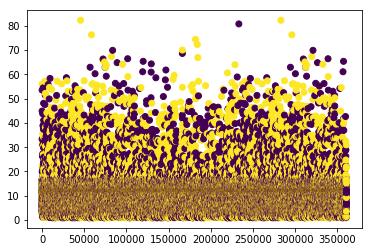

In [9]:
plt.scatter(normandie_df.index, normandie_df['_long'], c=predicted)
plt.show()

In [9]:
nswd_association('E:\\Projet stage\\Normandie\\NSWD', 'normandie.nswd')

In [22]:
load_list_mil = list_multiple_var("load_", 1, 7)
len(millau[load_list_mil][millau['load_1'] == 0])

2943

In [150]:
np.var(normandie['load_9']) # Variance

187.59891720937

In [168]:
neg_w2 = len(warningFlags[warningFlags['W2'] == 8 ])
print("Negative axle loads : " + str(neg_w2))

mult_w0 = len(warningFlags[warningFlags['W0'] == 1 ])
print("Multiple truck presence : " + str(mult_w0))

icomp_w6 = len(warningFlags[warningFlags['W6'] == 1 ])
print("Incomplete MP signals : " + str(icomp_w6))

for j in range(2):
    for i in range(1,17):
        if j and i == 16:
            break
        str_d = 'd_' if j else 'load_'
        str_sen = 'Dist. essieux ' if j else 'Charge essieu '
        sup = 7 if j else round(20/0.102)
        unit = 'm' if j else 'kN'
        str_d += str(i)
        print(str_sen + "\t" + str_d + "\t neg : " + str(len(normandie[normandie[str_d] < 0])) + " \tnull : " + str(len(normandie[normandie[str_d] == 0]))  + " \tsup(>"+str(sup)+ unit +") : " + str(len(normandie[normandie[str_d] > sup])))

    
print("Poids brut total neg : " + str(len(normandie[normandie['gross weight'] < 0])) + ", null : " + str(len(normandie[normandie['gross weight'] == 0])) + " et sup(>70t) : " + str(len(normandie[normandie['gross weight'] > (70/0.102)])))
print("Longueur neg : " + str(len(normandie[normandie['_long'] < 0])) + ", null : " + str(len(normandie[normandie['_long'] == 0])) + " et hors(2< x <25m) : " + str(len(normandie[normandie['_long'] > 25]) + len(normandie[normandie['_long'] < 2])))
print("Nbr essieux sup(>6) : " + str(len(normandie[normandie['N'] > 6])))

Negative axle loads : 1854
Multiple truck presence : 18206
Incomplete MP signals : 6775
Charge essieu 	load_1	 neg : 0 	null : 2934 	sup(>196kN) : 0
Charge essieu 	load_2	 neg : 0 	null : 2934 	sup(>196kN) : 0
Charge essieu 	load_3	 neg : 0 	null : 2317 	sup(>196kN) : 0
Charge essieu 	load_4	 neg : 0 	null : 1755 	sup(>196kN) : 0
Charge essieu 	load_5	 neg : 0 	null : 1248 	sup(>196kN) : 0
Charge essieu 	load_6	 neg : 0 	null : 912 	sup(>196kN) : 0
Charge essieu 	load_7	 neg : 0 	null : 635 	sup(>196kN) : 0
Charge essieu 	load_8	 neg : 0 	null : 487 	sup(>196kN) : 0
Charge essieu 	load_9	 neg : 0 	null : 384 	sup(>196kN) : 0
Charge essieu 	load_10	 neg : 0 	null : 311 	sup(>196kN) : 0
Charge essieu 	load_11	 neg : 0 	null : 251 	sup(>196kN) : 0
Charge essieu 	load_12	 neg : 0 	null : 200 	sup(>196kN) : 0
Charge essieu 	load_13	 neg : 0 	null : 145 	sup(>196kN) : 0
Charge essieu 	load_14	 neg : 0 	null : 112 	sup(>196kN) : 0
Charge essieu 	load_15	 neg : 0 	null : 74 	sup(>196kN) : 0
Ch

In [169]:
df = pd.concat([normandie, warningFlags], axis=1)

In [170]:
df_noNegAxle = df.drop(df[df['W1'] == 8].index)

In [171]:
neg_w2 = len(df[df['W1'] == 8 ])
print("Negative axle loads : " + str(neg_w2))

mult_w0 = len(df[df['W0'] == 1 ])
print("Multiple truck presence : " + str(mult_w0))

icomp_w6 = len(df[df['W6'] == 1 ])
print("Incomplete MP signals : " + str(icomp_w6))

for j in range(2):
    for i in range(1,17):
        if j and i == 16:
            break
        str_d = 'd_' if j else 'load_'
        str_sen = 'Dist. essieux ' if j else 'Charge essieu '
        sup = 7 if j else (20/0.102)
        unit = 'm' if j else 'kN'
        str_d += str(i)
        print(str_sen + "\t" + str_d + "\t neg : " + str(len(df[df[str_d] < 0])) + " \tnull : " + str(len(df[df[str_d] == 0]))  + " \tsup(>"+str(sup)+ unit +") : " + str(len(df[df[str_d] > sup])))
    
print("Poids brut total neg : " + str(len(df[df['gross weight'] < 0])) + ", null : " + str(len(df[df['gross weight'] == 0])) + " et sup(>70t) : " + str(len(df[df['gross weight'] > (70/0.102)])))
print("Longueur neg : " + str(len(df[df['_long'] < 0])) + ", null : " + str(len(df[df['_long'] == 0])) + " et hors(2< x <25m) : " + str(len(df[df['_long'] > 25]) + len(df[df['_long'] < 2])))
print("Nbr essieux sup(>6) : " + str(len(df[df['N'] > 6])))

Negative axle loads : 2934
Multiple truck presence : 18206
Incomplete MP signals : 6775
Charge essieu 	load_1	 neg : 0 	null : 2934 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_2	 neg : 0 	null : 2934 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_3	 neg : 0 	null : 2317 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_4	 neg : 0 	null : 1755 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_5	 neg : 0 	null : 1248 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_6	 neg : 0 	null : 912 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_7	 neg : 0 	null : 635 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_8	 neg : 0 	null : 487 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_9	 neg : 0 	null : 384 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_10	 neg : 0 	null : 311 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_11	 neg : 0 	null : 251 	sup(>196.07843137254903kN) : 0
Charge essieu 	load_12	 neg : 0 	null : 200 	sup(>196.07843137254903kN) : 0
Char

In [173]:
df_sous25 = df_noNegAxle[df_noNegAxle['_long'] < 25]

In [18]:
plt.scatter(df_sous25['gross weight']*0.102, df_sous25['_long'])
plt.title("Poid lourds sans axe négatif")
plt.xlabel('gross weight (t)')
plt.ylabel('long (m)')
plt.show()

NameError: name 'df_sous25' is not defined

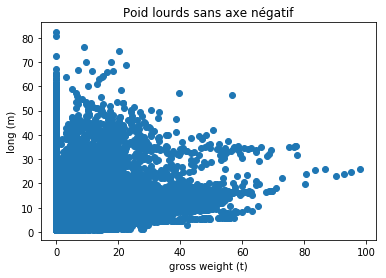

In [17]:
plt.scatter(normandie['gross weight']*0.102, normandie['_long'])
plt.title("Poid lourds sans axe négatif")
plt.xlabel('gross weight (t)')
plt.ylabel('long (m)')
plt.show()